### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

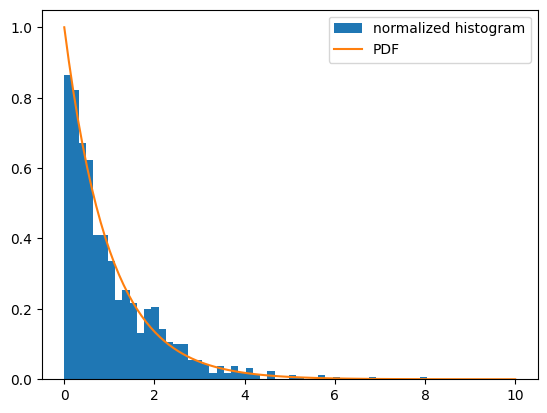

Forma:  0.9597863127832368
CDF: 0.8646647167633873
PPF: 0.6931471805599455
Second Moment: 2.0
Mean: 1.0
Variance: 1.0
Standard Deviation: 1.0


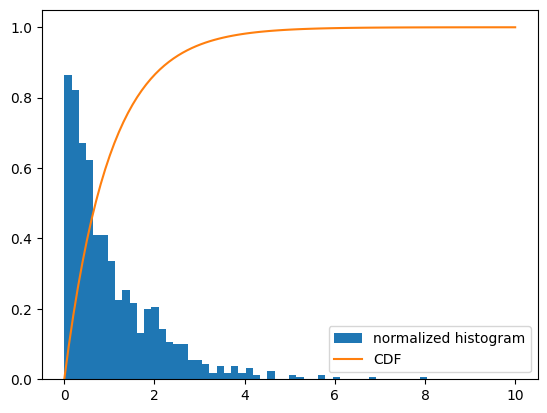

Varianza: 1.0


In [7]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
dist= sp.stats.gamma(a=1,scale=1)
sample = dist.rvs(size=1000) # "random variate sample"
sample
plt.hist(sample, bins=50, density=True, label='normalized histogram') 
x = np.linspace(0, 10, 100)  # intervallo, divisioni
plt.plot(x, dist.pdf(x), label='PDF')
plt.legend()
plt.show()
forma, loc, scala = sp.stats.gamma.fit(sample)
print("Forma: ", forma)
# Calcola la funzione di distribuzione cumulativa (CDF) per un valore specifico
cdf_value = dist.cdf(2)
print("CDF:", cdf_value)

# Calcola la funzione di distribuzione cumulativa inversa (PPF) per una probabilità specifica
ppf_value = dist.ppf(0.5)
print("PPF:", ppf_value)

# Calcola il momento n-esimo della distribuzione
moment_value = dist.moment(2)  # Secondo momento
print("Second Moment:", moment_value)

# Calcola la media della distribuzione
mean_value = dist.mean()
print("Mean:", mean_value)

# Calcola la varianza della distribuzione
variance_value = dist.var()
print("Variance:", variance_value)

# Calcola la deviazione standard della distribuzione
std_dev_value = dist.std()
print("Standard Deviation:", std_dev_value)
plt.hist(sample, bins=50, density=True, label='normalized histogram') 
plt.plot(x, dist.cdf(x), label='CDF')
plt.legend()
plt.show()
print("Varianza:", variance_value)

### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

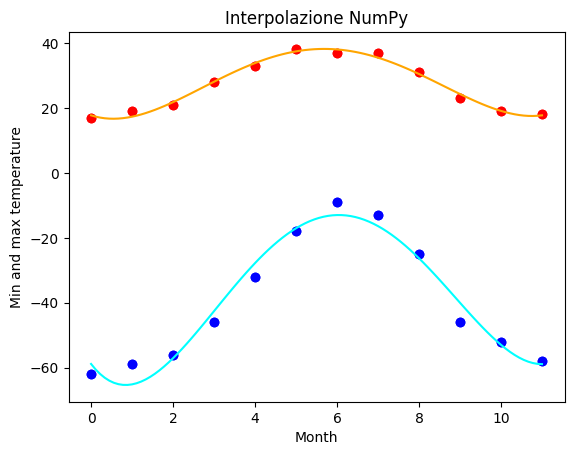

MAE (temp_max) NumPy: 0.781177156177157
MAE (temp_min) NumPy: 2.956973581973653
RMSE (temp_max) NumPy: 0.9301038867208549
RMSE (temp_min) NumPy: 3.4879124903778185


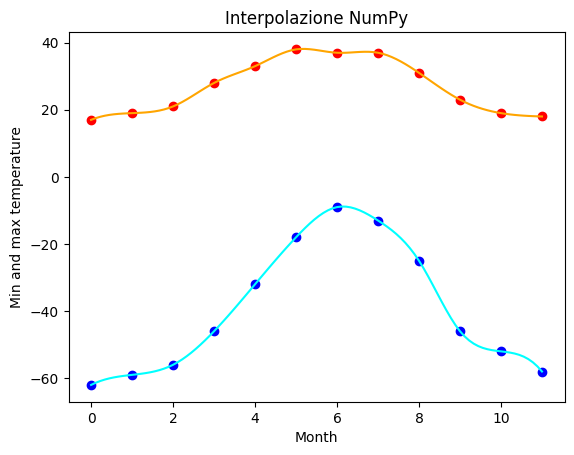

MAE (temp_max) Scipy: 2.9605947323337506e-16
MAE (temp_min) Scipy: 2.9605947323337506e-16
RMSE (temp_max) Scipy: 1.0255800994045674e-15
RMSE (temp_min) Scipy: 1.0255800994045674e-15


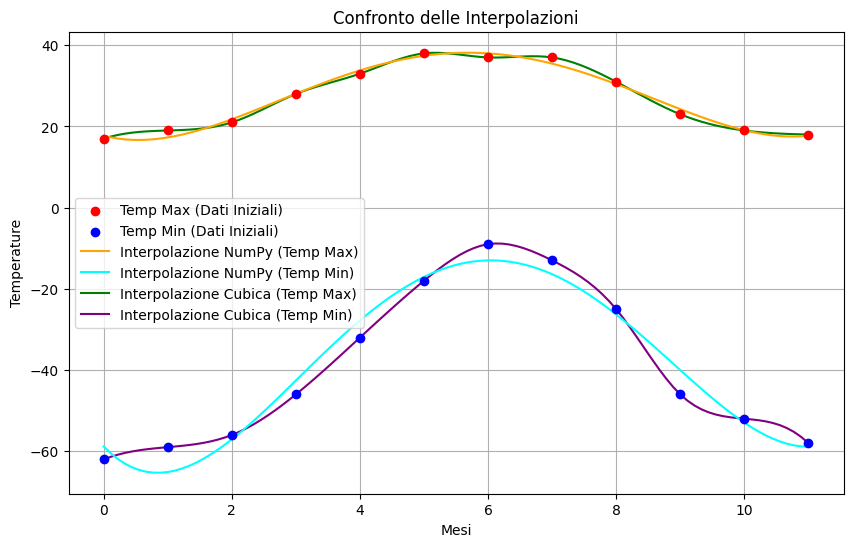

In [8]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")
x_int = np.linspace(0, 11, 100)
coeffs_1 = np.polyfit(months, temp_max, 4)
y_np_int_1 = np.polyval(coeffs_1, x_int)
coeffs_2 = np.polyfit(months, temp_min, 4)
y_np_int_2 = np.polyval(coeffs_2, x_int)

plt.title("Interpolazione NumPy")
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")
plt.plot(x_int, y_np_int_1, color='orange')
plt.plot(x_int, y_np_int_2, color='cyan')
plt.show()

y_np_int_1_interp = np.interp(months, x_int, y_np_int_1)
y_np_int_2_interp = np.interp(months, x_int, y_np_int_2)

mae_np = np.mean(np.abs(temp_max - y_np_int_1_interp))
mae_np_2 = np.mean(np.abs(temp_min - y_np_int_2_interp))
print("MAE (temp_max) NumPy:", mae_np)
print("MAE (temp_min) NumPy:", mae_np_2)
rmse_np = np.sqrt(np.mean((temp_max - y_np_int_1_interp)**2))
rmse_np_2 = np.sqrt(np.mean((temp_min - y_np_int_2_interp)**2))
print("RMSE (temp_max) NumPy:", rmse_np)
print("RMSE (temp_min) NumPy:", rmse_np_2)
f_cubic_1 = sp.interpolate.interp1d(months, temp_max, kind='cubic')
y_cubic_1 = f_cubic_1(x_int)
f_cubic_2 = sp.interpolate.interp1d(months, temp_min, kind='cubic')
y_cubic_2 = f_cubic_2(x_int)

plt.title("Interpolazione NumPy")
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")
plt.plot(x_int, y_cubic_1, color='orange')
plt.plot(x_int, y_cubic_2, color='cyan')
plt.show()


y_cubic_1_interp = f_cubic_1(months)
y_cubic_2_interp = f_cubic_2(months)


mae_cubic = np.mean(np.abs(temp_max - y_cubic_1_interp))
mae_cubic_2 = np.mean(np.abs(temp_min - y_cubic_2_interp))
print("MAE (temp_max) Scipy:", mae_cubic)
print("MAE (temp_min) Scipy:", mae_cubic_2)
rmse_cubic = np.sqrt(np.mean((temp_max - y_cubic_1_interp)**2))
rmse_cubic_2 = np.sqrt(np.mean((temp_min - y_cubic_2_interp)**2))
print("RMSE (temp_max) Scipy:", rmse_cubic)
print("RMSE (temp_min) Scipy:", rmse_cubic_2)
plt.figure(figsize=(10, 6))

# Scatter plot dei dati iniziali
plt.scatter(months, temp_max, color='red', label='Temp Max (Dati Iniziali)', zorder=5)
plt.scatter(months, temp_min, color='blue', label='Temp Min (Dati Iniziali)', zorder=5)

# Linee di interpolazione
plt.plot(x_int, y_np_int_1, color='orange', label='Interpolazione NumPy (Temp Max)', zorder=4)
plt.plot(x_int, y_np_int_2, color='cyan', label='Interpolazione NumPy (Temp Min)', zorder=4)
plt.plot(x_int, y_cubic_1, color='green', label='Interpolazione Cubica (Temp Max)', zorder=3)
plt.plot(x_int, y_cubic_2, color='purple', label='Interpolazione Cubica (Temp Min)', zorder=3)

# Configurazione del grafico
plt.title("Confronto delle Interpolazioni")
plt.xlabel("Mesi")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()

### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

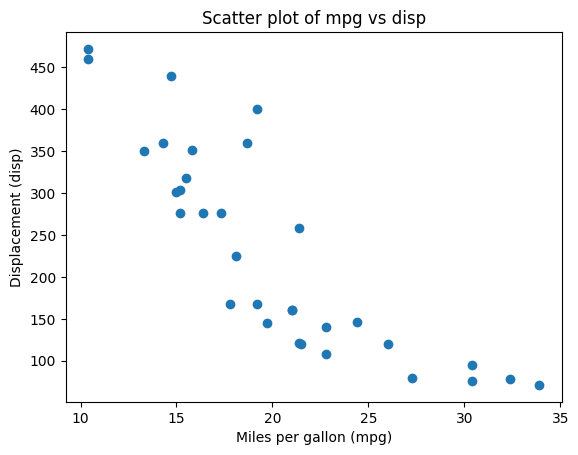

Slope: -17.429121670356285
Intercept: 580.8838225585017


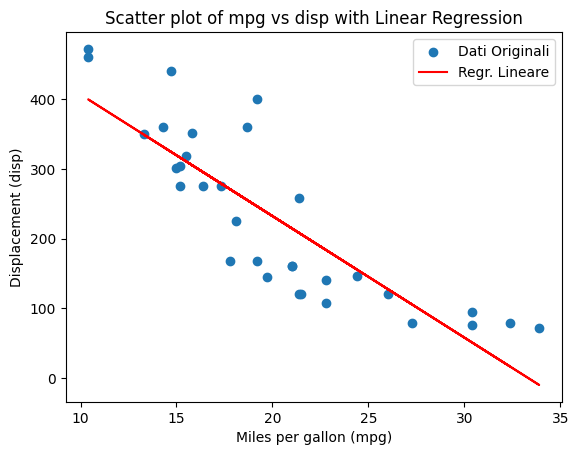

MAE (NumPy): 53.20774057606377
RMSE (NumPy): 64.7400133662678


In [9]:
import pandas as pd

# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
df

plt.scatter(df['mpg'], df['disp'])
plt.xlabel('Miles per gallon (mpg)')
plt.ylabel('Displacement (disp)')
plt.title('Scatter plot of mpg vs disp')
plt.show()
#i dati sembrano avere un andamento lineare, quindi possiamo usare la regressione lineare per fare una previsione
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df['mpg'], df['disp'])
print("Slope:", slope)
print("Intercept:", intercept)
# Calcola i valori previsti
predicted_disp = slope * df['mpg'] + intercept
plt.scatter(df['mpg'], df['disp'], label='Dati Originali')
plt.plot(df['mpg'], predicted_disp, color='red', label='Regr. Lineare')
plt.xlabel('Miles per gallon (mpg)')
plt.ylabel('Displacement (disp)')
plt.title('Scatter plot of mpg vs disp with Linear Regression')
plt.legend()
plt.show()
def calculate_rmse(y_real, y_pred):
    if len(y_real) != len(y_pred):
        raise ValueError("Le liste devono avere la stessa lunghezza.")
    mse = sum((y_real[i] - y_pred[i]) ** 2 for i in range(len(y_real))) / len(y_real)
    return math.sqrt(mse)

def calculate_mae(y_real, y_pred):
    if len(y_real) != len(y_pred):
        raise ValueError("Le liste devono avere la stessa lunghezza.")
    errors = [abs(y_real[i] - y_pred[i]) for i in range(len(y_real))]
    return sum(errors) / len(errors)



# MAE e RMSE per lineare (NumPy)
mae = calculate_mae(df['disp'], predicted_disp)
rmse = calculate_rmse(df['disp'], predicted_disp)
print("MAE (NumPy):", mae)
print("RMSE (NumPy):", rmse)
